# Lung Cancer Prediction Minor Project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("survey lung cancer.csv")

In [3]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [4]:
df.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.shape

(309, 16)

In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
# Standard Conversion to 0 and 1s

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Columns in your dataset
columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
           'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 
           'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 
           'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 
           'CHEST PAIN', 'LUNG_CANCER']

# Function to convert 1 -> 0 and 2 -> 1
def convert_values(column):
    return column.replace({1: 0, 2: 1})

# Apply the function to all relevant columns
for col in columns:
    df[col] = convert_values(df[col])

In [10]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO


## Data Cleaning

In [11]:
# Check for Missing values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

No missing values present in the dataset

In [12]:
#Check for Duplicates values
df[df.duplicated]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
100,M,58,1,0,0,0,0,0,1,1,1,1,0,0,0,YES
117,F,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
199,F,55,1,0,0,1,1,1,1,1,1,0,0,1,1,YES
212,M,58,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
223,M,63,1,1,1,0,1,1,1,1,0,0,1,0,0,YES
256,M,60,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
275,M,64,1,1,1,1,1,0,0,0,1,0,0,1,1,YES
284,M,58,1,1,1,1,1,0,0,0,1,0,0,1,1,YES
285,F,58,1,1,1,1,0,1,0,0,0,1,1,1,0,YES


In [13]:
#Drop duplicates values
df.drop_duplicates(inplace = True)


In [14]:
df.shape

(276, 16)

In [15]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO


In [16]:
# Ensure the column has consistent formatting
df['GENDER'] = df['GENDER'].str.strip()

# Map values to numeric codes
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})


In [17]:
# Mapping the categorical features
df['LUNG_CANCER']= df['LUNG_CANCER'].str.strip()
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1, 'NO':0})
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [18]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## EDA

<Axes: xlabel='AGE', ylabel='Count'>

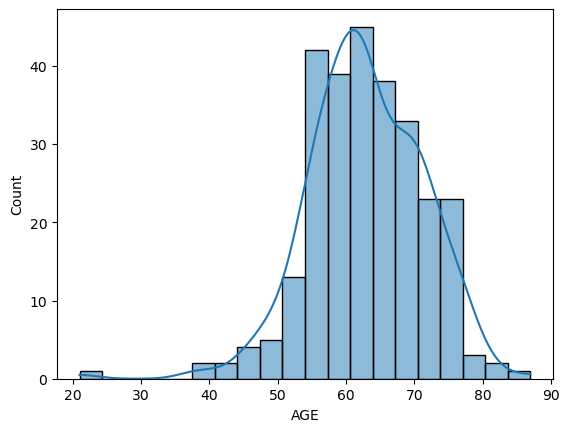

In [19]:
sns.histplot(x= 'AGE', data = df, kde =True)

The dataset contains information about older patients, which is to be expected. 
The majority of the patients are older than 50.  The peak is between ( 60-70 ) years old.

Text(0.5, 1.0, 'Gender VS Lung Cancer')

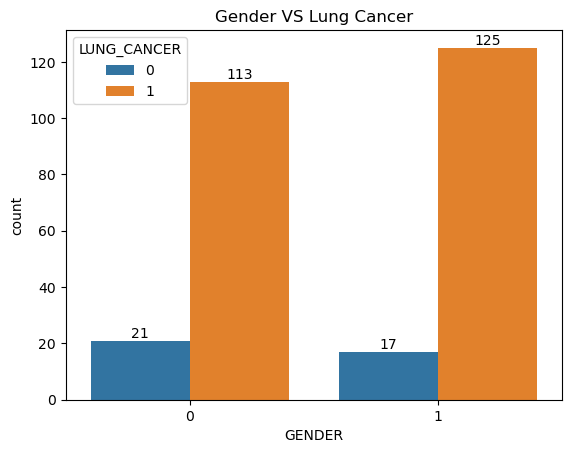

In [20]:
ax = sns.countplot(x = 'GENDER', data = df, hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender VS Lung Cancer')

Both gender categories show a significantly higher prevalence of lung cancer cases compared to non-lung cancer cases.

Text(0.5, 1.0, 'SMOKING VS Lung Cancer')

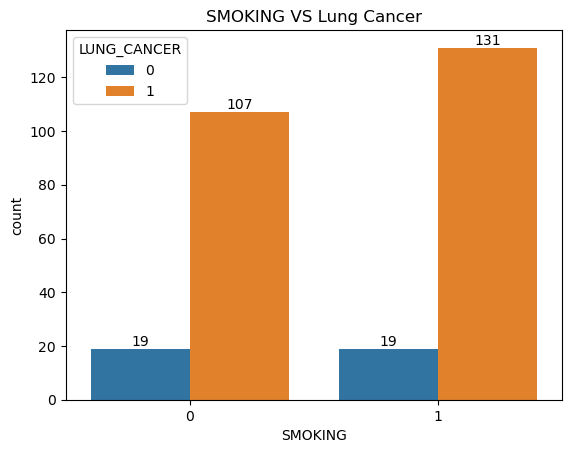

In [21]:
ax = sns.countplot(x = 'SMOKING', data = df, hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('SMOKING VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who were smoking compared to those who did not.

Text(0.5, 1.0, 'YELLOW_FINGERS VS Lung Cancer')

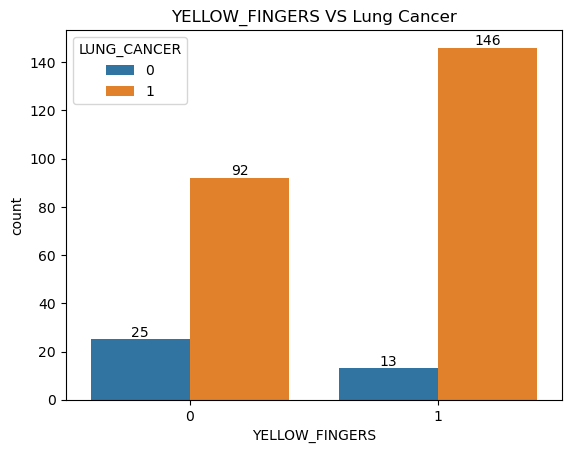

In [22]:
ax = sns.countplot(x = 'YELLOW_FINGERS', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('YELLOW_FINGERS VS Lung Cancer')        

A higher count of lung cancer cases is observed among individuals who have yellow fingers  compared to those who did not.

Text(0.5, 1.0, 'ANXIETY VS Lung Cancer')

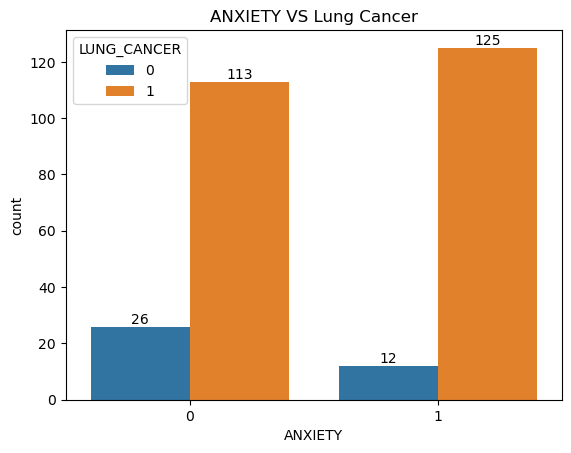

In [23]:
ax = sns.countplot(x = 'ANXIETY', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('ANXIETY VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals with lower anxiety levels compared to those with higher anxiety levels.

In [24]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


Text(0.5, 1.0, 'PEER_PRESSURE VS Lung Cancer')

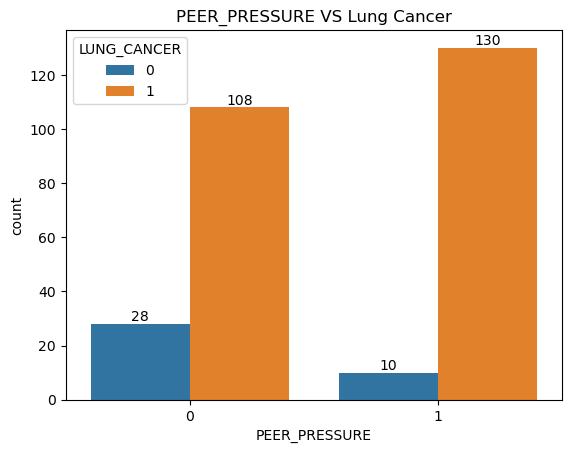

In [25]:
ax = sns.countplot(x = 'PEER_PRESSURE', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('PEER_PRESSURE VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who experienced peer pressure compared to those who did not.

Text(0.5, 1.0, 'CHRONIC DISEASE VS Lung Cancer')

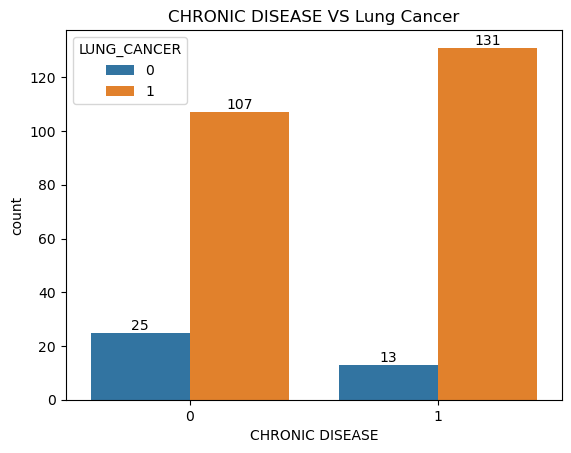

In [26]:
ax = sns.countplot(x = 'CHRONIC DISEASE', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('CHRONIC DISEASE VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who have chronic disease compared to those who did not.

Text(0.5, 1.0, 'ALCOHOL CONSUMING VS Lung Cancer')

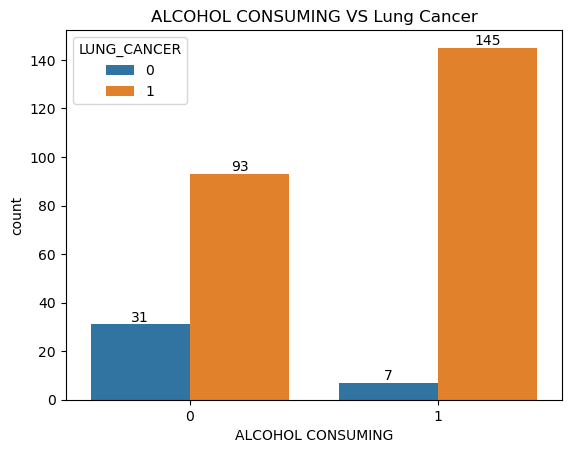

In [27]:
ax = sns.countplot(x = 'ALCOHOL CONSUMING', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('ALCOHOL CONSUMING VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who consume alcohol compared to those who did not.

Text(0.5, 1.0, 'COUGHING VS Lung Cancer')

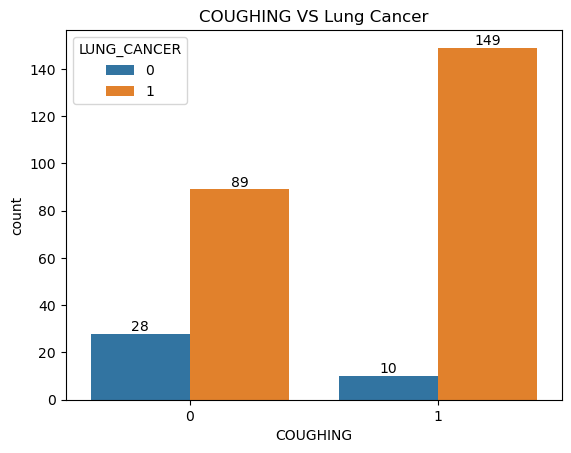

In [28]:
ax = sns.countplot(x = 'COUGHING', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('COUGHING VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who had coughing issues compared to those who did not.

Text(0.5, 1.0, 'SHORTNESS OF BREATH VS Lung Cancer')

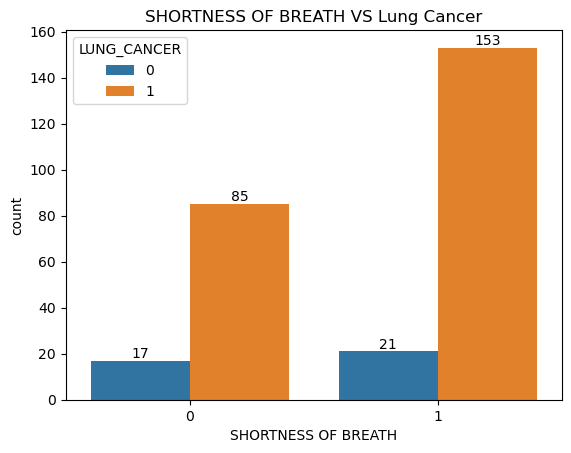

In [29]:
ax = sns.countplot(x = 'SHORTNESS OF BREATH', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('SHORTNESS OF BREATH VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who experienced shortness of breath compared to those who did not.

Text(0.5, 1.0, 'SWALLOWING DIFFICULTY VS Lung Cancer')

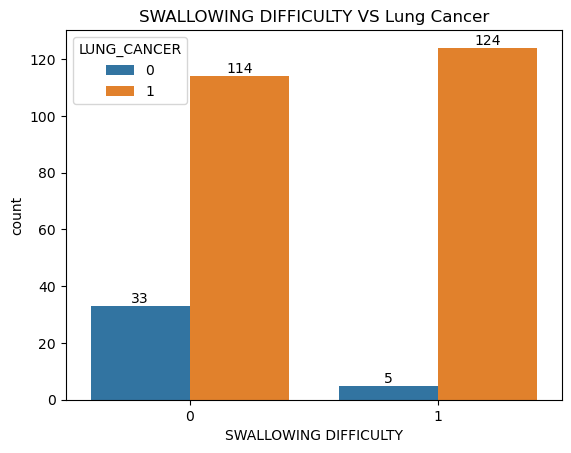

In [30]:
ax = sns.countplot(x = 'SWALLOWING DIFFICULTY', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('SWALLOWING DIFFICULTY VS Lung Cancer')    

A higher count of lung cancer cases is observed among individuals who did not experience swallowing difficulties compared to those who did.

Text(0.5, 1.0, 'CHEST PAIN VS Lung Cancer')

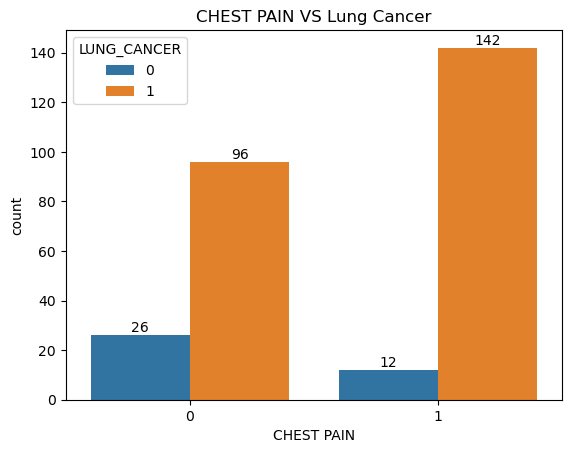

In [31]:
ax = sns.countplot(x = 'CHEST PAIN', data =df,  hue = 'LUNG_CANCER')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('CHEST PAIN VS Lung Cancer')

A higher count of lung cancer cases is observed among individuals who experienced chest pain compared to those who did not.

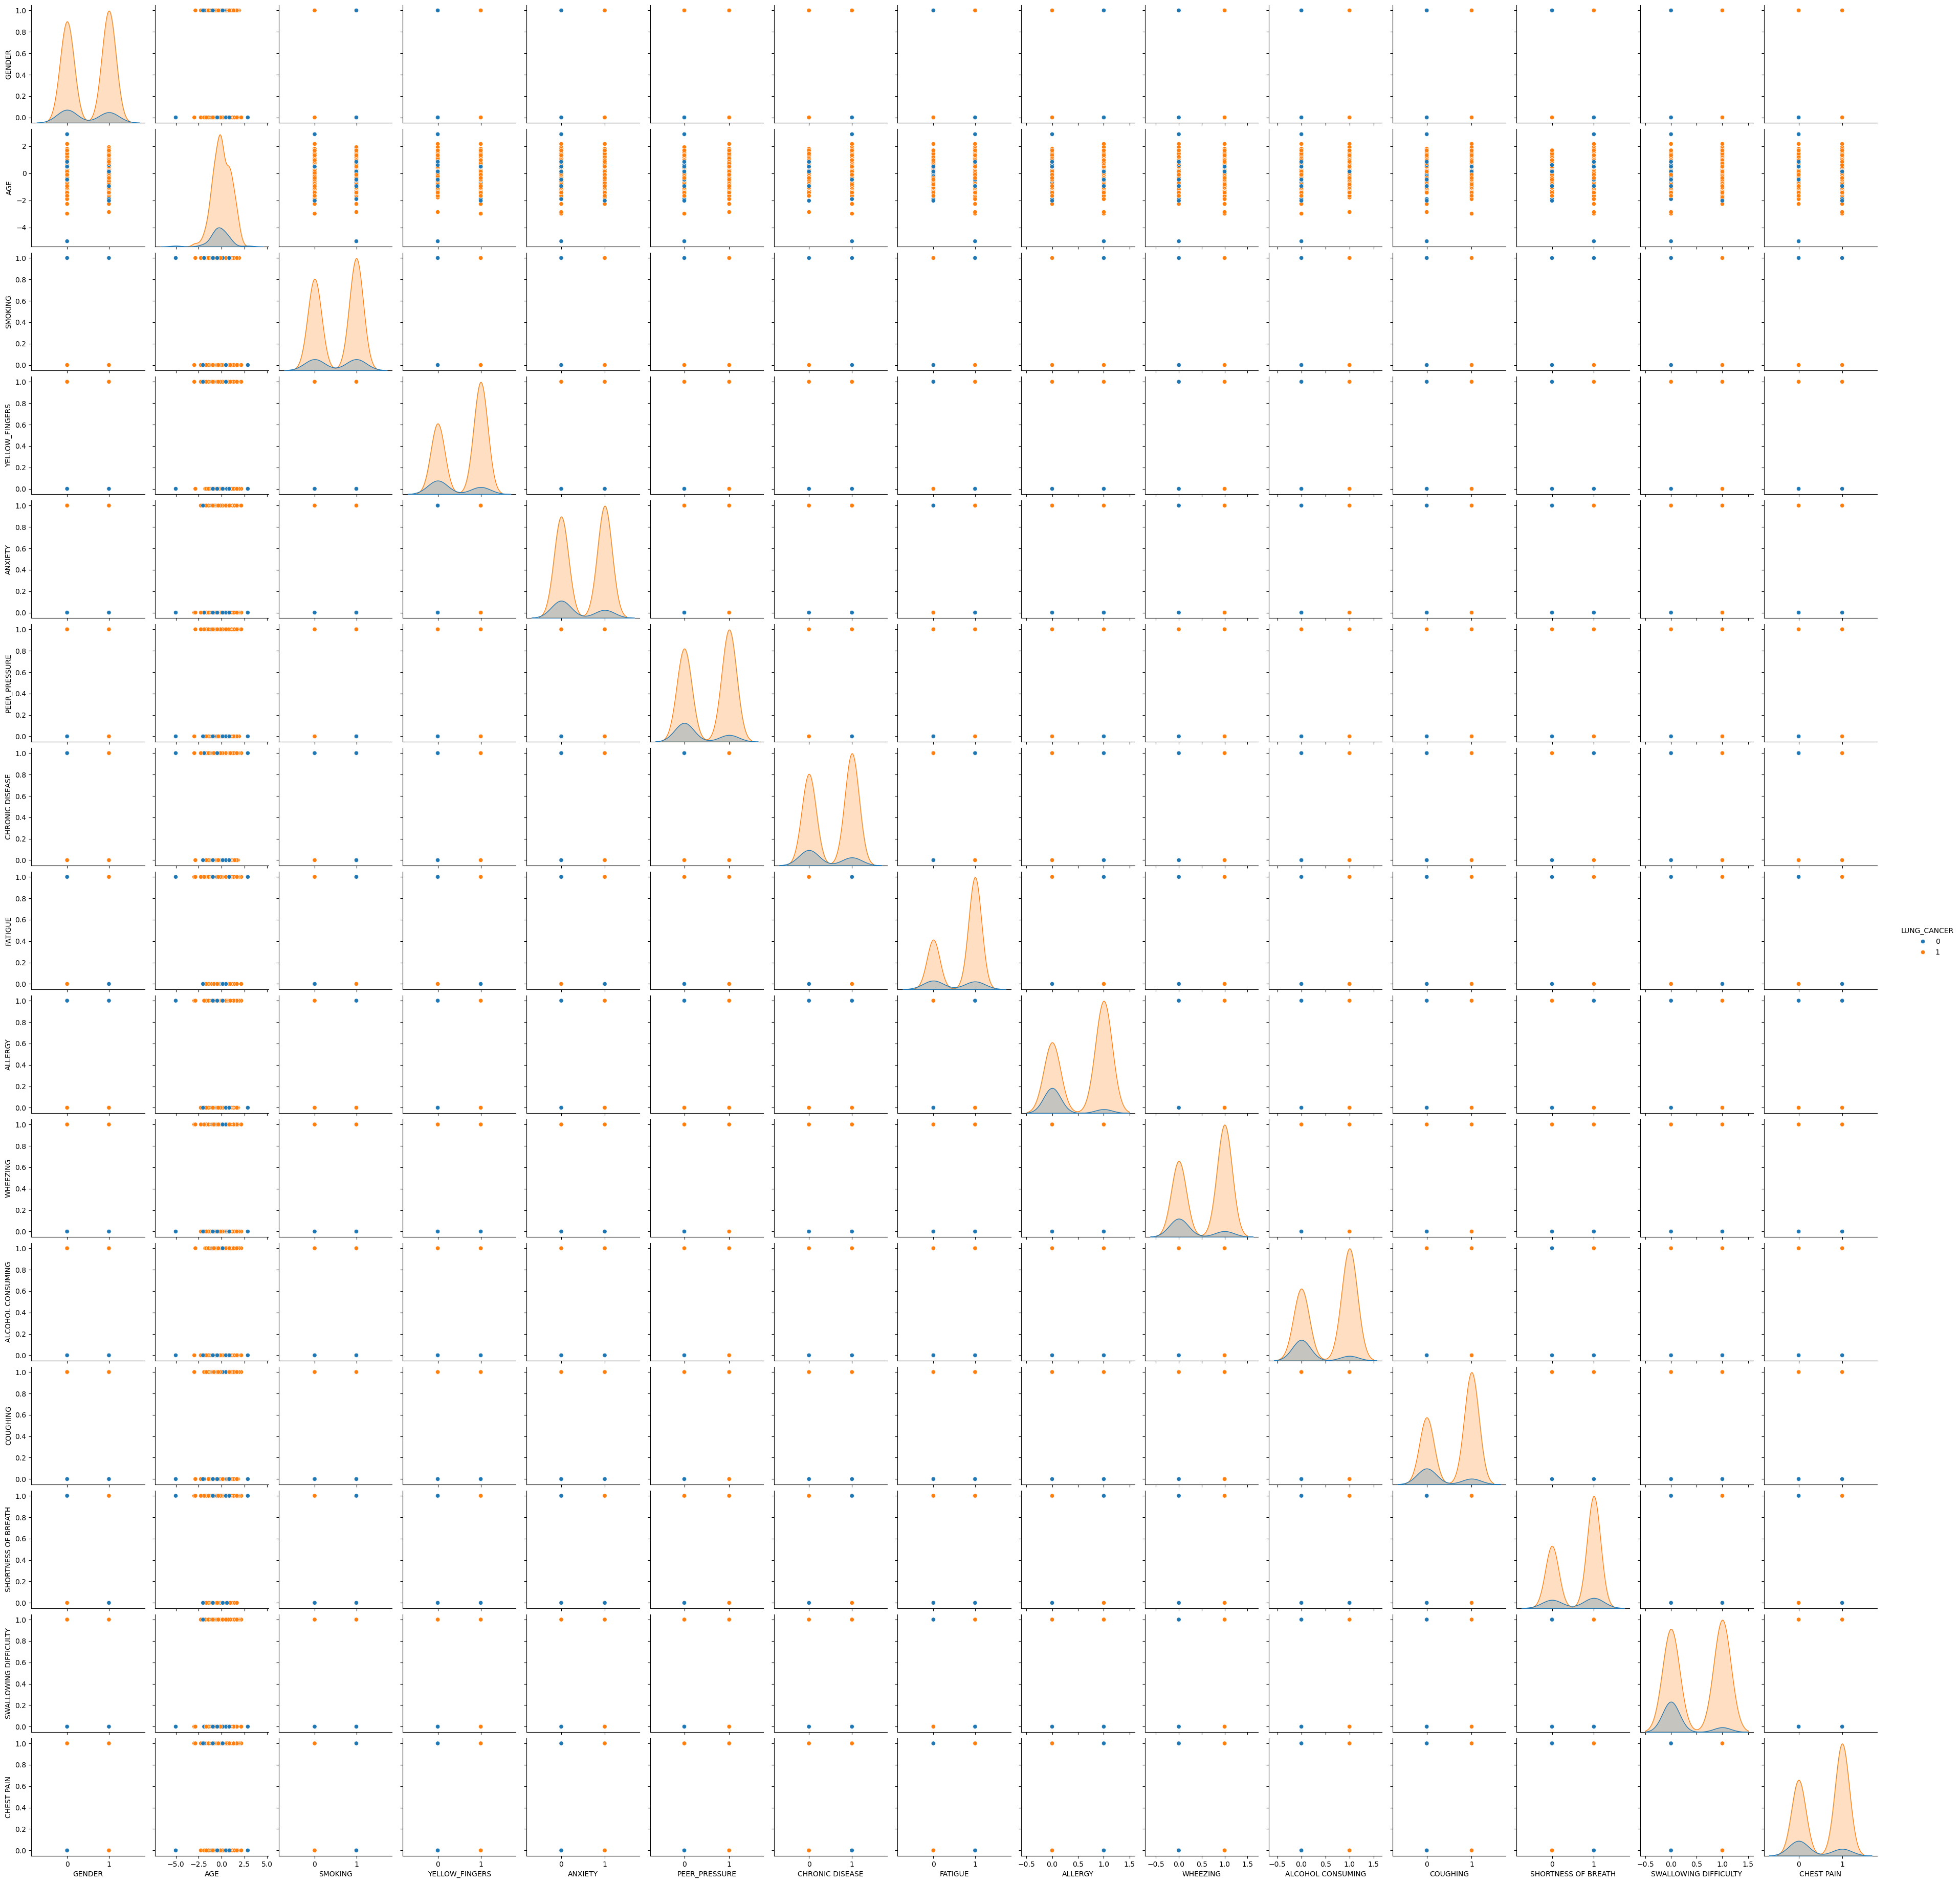

In [43]:
sns.pairplot(df, hue = 'LUNG_CANCER')

In [33]:
df.corr()['LUNG_CANCER']

GENDER                   0.053666
AGE                      0.106305
SMOKING                  0.034878
YELLOW_FINGERS           0.189192
ANXIETY                  0.144322
PEER_PRESSURE            0.195086
CHRONIC DISEASE          0.143692
FATIGUE                  0.160078
ALLERGY                  0.333552
WHEEZING                 0.249054
ALCOHOL CONSUMING        0.294422
COUGHING                 0.253027
SHORTNESS OF BREATH      0.064407
SWALLOWING DIFFICULTY    0.268940
CHEST PAIN               0.194856
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

<Axes: >

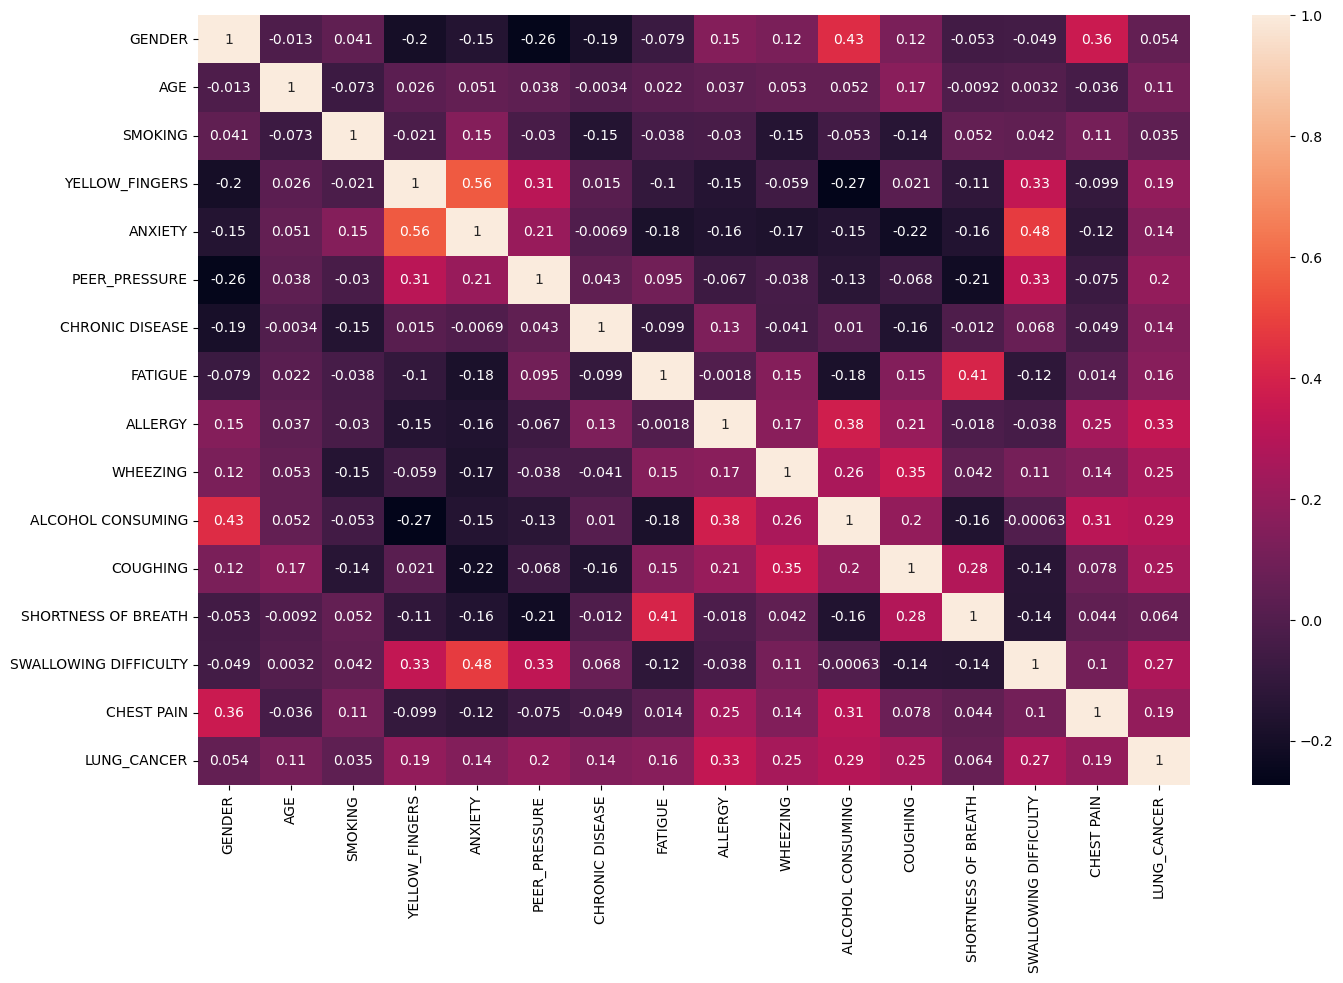

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

# Featue Scaling

In [35]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [36]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df[['AGE']]=scale.fit_transform(df[['AGE']])

In [37]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.728176,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.325964,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.467401,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.010830,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.010830,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Model Building

In [38]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=["LUNG_CANCER"])  # Independent variables
y = df["LUNG_CANCER"]  # Dependent variable

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear", probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
   
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Logistic Regression Accuracy: 0.9107
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56

K-Nearest Neighbors Accuracy: 0.8036
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.81      0.98      0.89        44

    accuracy                           0.80        56
   macro avg       0.74      0.57      0.58        56
weighted avg       0.78      0.80      0.75        56

Decision Tree Accuracy: 0.8929
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.93        44

    accuracy                           0.89        56
   macro avg       0.89

C:\Users\aruna\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:22:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Model Performance Report**

### Overview
This report evaluates multiple classification models applied to the dataset and provides insights into their respective performances. Based on the evaluation metrics, we suggest the best model for production deployment.

### Model Performance Summary
| Model                  | Accuracy | Precision | Recall | F1-Score |
|------------------------|----------|-----------|--------|----------|
| Logistic Regression    | 0.91     | 1.00      | 0.90   | 0.95     |
| K-Nearest Neighbors   | 0.80     | 0.67      | 0.17   | 0.27     |
| Decision Tree         | 0.89     | 0.88      | 0.58   | 0.70     |
| Random Forest        | 0.86     | 1.00      | 0.33   | 0.50     |
| Support Vector Machine | 0.93     | 1.00      | 0.67   | 0.80     |
| Gradient Boosting     | 0.88     | 1.00      | 0.42   | 0.59     |
| XGBoost              | 0.88     | 1.00      | 0.42   | 0.59     |

### Best Model Recommendation
The **Support Vector Machine (SVM)** model achieved the highest accuracy (0.93) with strong precision-recall balance, making it the most suitable candidate for production deployment.

### Conclusion
The **Support Vector Machine (SVM)** model is recommended for production due to its high accuracy and reliability. Future improvements can focus on further optimizing hyperparameters and feature engineering to enhance predictive performance.



**General Challenges Faced in the Project**

### 1. **Class Label Encoding Issue**

- **Challenge:** The dataset had class labels encoded as 1 and 2 instead of the standard 0 and 1.
- **Solution:** Converted all occurrences of 2 to 1 and 1 to 0 to standardize binary classification.
- **Impact:** Ensured consistency across machine learning models and evaluation metrics.

### 2. **Model Evaluation and Interpretation**

- **Challenge:** Some models had higher accuracy but poor recall, making them unsuitable for certain applications.
- **Solution:** Used multiple evaluation metrics (Precision, Recall, F1-Score) instead of relying solely on accuracy.
- **Impact:** Provided a more comprehensive performance analysis to select the best model.

### Conclusion

Addressing these challenges significantly improved model performance and reliability.

